# Russian Car Plate Detection with OpenCV and TesseractOCR in Python



## Contents
- Section 1 - Car Plate Detection with OpenCV and Haar Cascade
- Section 2 - Car Plate Number Recognition and Extraction with TesseractOCR

Let's detect car license plates (of Russian cars) and extract the text from these number plates

In [32]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract

# Set tesseract path to where the tesseract exe file is located (Edit this path accordingly based on your own settings)
pytesseract.pytesseract.tesseract_cmd = r'/usr/share/tesseract-ocr/tesseract-ocr-w64-setup-5.3.0.20221222.exe'

In [6]:
# Read car image and convert color to RGB
carplate_img = cv2.imread('./images/car_image.png')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)#switch it to RGB format

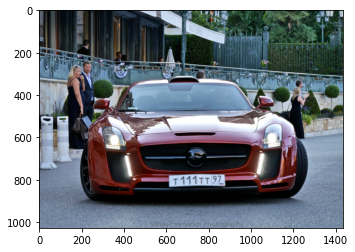

In [7]:
plt.imshow(carplate_img_rgb);

In [8]:
# Function to enlarge the plt display for user to view more clearly
def enlarge_plt_display(image, scale_factor):
    width = int(image.shape[1] * scale_factor / 100)
    height = int(image.shape[0] * scale_factor / 100)
    dim = (width, height)
    plt.figure(figsize = dim)
    plt.axis('off') 
    plt.imshow(image)

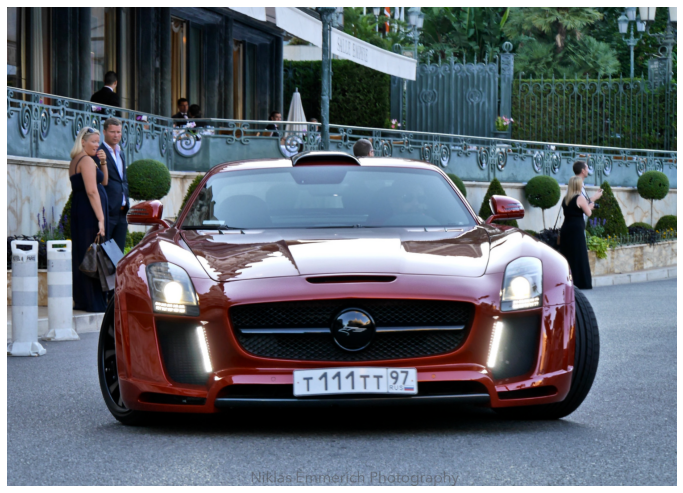

In [12]:
enlarge_plt_display(carplate_img_rgb, 0.9)

In [14]:
carplate_haar_cascade = cv2.CascadeClassifier('./haar_cascades/haarcascade_russian_plate_number.xml')
#bring in the Haar Cascade feature set (XML file) for Russian car plates, using OpenCV’s CascadeClassifier

In [15]:
# Setup function to detect car plate
def carplate_detect(image):
    carplate_overlay = image.copy() # Create overlay to display red rectangle of detected car plate

    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=5)  #run the detection
    #allows us to detect objects of different sizes in the input image, and it returns a list of rectangle bounds where objects are detected.
    # scaleFactor specifies how much the image size is reduced at each image scale
    # how many neighbors each candidate rectangle should have for the candidate rectangle to be retained.


    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
    return carplate_overlay

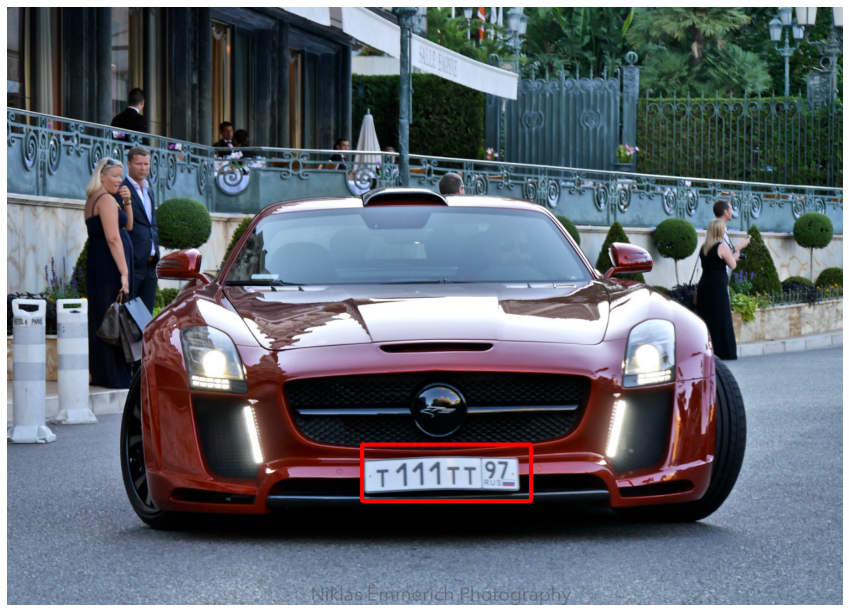

In [17]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
enlarge_plt_display(detected_carplate_img, 1.1)

___
<a name="section-2"></a>
## 2 - Car Plate Number Recognition and Extraction with TesseractOCR

In [18]:
# Function to retrieve only the car plate sub-image 
def carplate_extract(image):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20] 
        
    return carplate_img

In [19]:
# Enlarge image for further image processing later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

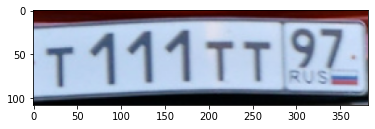

In [20]:
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img);

#### Processing to improve accuracy of TesseractOCR's results

This is because we want to focus on the important edges and shapes of the image, and converting to grayscale helps to optimize this detection process.

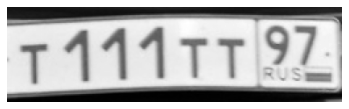

In [21]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

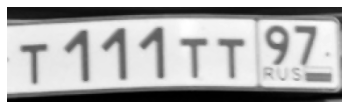

In [22]:
# Apply median blur + grayscale
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # Kernel size 3, - denoising
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray');

In [34]:
# Display the text extracted from the car plate
print(pytesseract.image_to_string(carplate_extract_img_gray_blur, \
                                  config = f'--psm 8 --oem 3 \
                                  -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

In [ ]:
# Testing all PSM values

''' 
tessedit_char_whitelist helps to restrict the TesseractOCR function to a set of pre-defined (white-listed) characters. 
--oem refers to OCR Engine Mode (OEM), and the value corresponds to whichever engine mode we want. F
--psm refers to Page Segmentation Modes (PSM)
'''
for i in range(3,14):
    print(f'PSM: {i}')
    print(pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                      config = f'--psm {i} --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

PSM: 3
T111TTI2

PSM: 4
T111TTI2

PSM: 5
O

PSM: 6
T111TTI2

PSM: 7
T111TTI2

PSM: 8
T111TT97

PSM: 9
RRRRESS

PSM: 10
T111TTI2

PSM: 11
T111TT92

PSM: 12
T111TT92

PSM: 13
T111TT97



___
### References
- https://docs.opencv.org/master/
- https://www.tutorialkart.com/opencv/python/
- https://nanonets.com/blog/ocr-with-tesseract
- https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html